In [1]:
import seaborn as sns

In [2]:
# loading titanic dataset
df = sns.load_dataset('titanic')
df

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  
0      man        True  NaN  Southampton    no  False  
1    woman       False    C    Cherbourg   yes  False  
2    woman       False  NaN  Southampton   yes   True  
3    woman       False    C  Southampton   yes  False  
4      man        True  NaN  Southampton    no   True  
..     ...         ...  ...          ...   ...    ...  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True  

[891 rows x 15 columns]

In [3]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [4]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<Axes: >

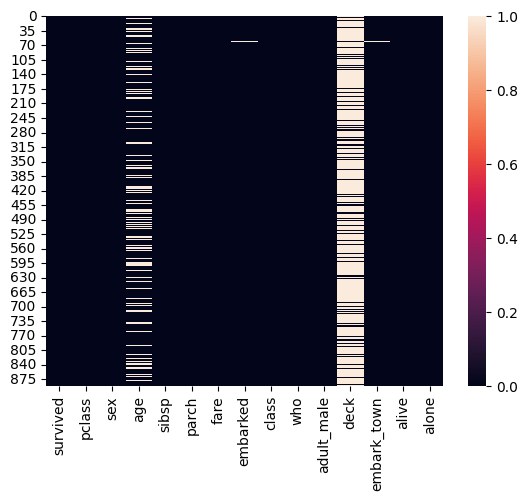

In [6]:
# visual representation of missing values
sns.heatmap(df.isnull())

### Method: 01 completly removing the null value

In [8]:
# method: 01 completly removing the null value
df.dropna() # default: row will be deleted

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
1           1       1  female  38.0      1      0  71.2833        C  First   
3           1       1  female  35.0      1      0  53.1000        S  First   
6           0       1    male  54.0      0      0  51.8625        S  First   
10          1       3  female   4.0      1      1  16.7000        S  Third   
11          1       1  female  58.0      0      0  26.5500        S  First   
..        ...     ...     ...   ...    ...    ...      ...      ...    ...   
871         1       1  female  47.0      1      1  52.5542        S  First   
872         0       1    male  33.0      0      0   5.0000        S  First   
879         1       1  female  56.0      0      1  83.1583        C  First   
887         1       1  female  19.0      0      0  30.0000        S  First   
889         1       1    male  26.0      0      0  30.0000        C  First   

       who  adult_male deck  embark_town alive  alone  
1    woman       False    C    Cherbourg   yes  False  
3    woman       False    C  Southampton   yes  False  
6      man        True    E  Southampton    no   True  
10   child       False    G  Southampton   yes  False  
11   woman       False    C  Southampton   yes   True  
..     ...         ...  ...          ...   ...    ...  
871  woman       False    D  Southampton   yes  False  
872    man        True    B  Southampton    no   True  
879  woman       False    C    Cherbourg   yes  False  
887  woman       False    B  Southampton   yes   True  
889    man        True    C    Cherbourg   yes   True  

[182 rows x 15 columns]

In [10]:
df.dropna(axis=1) # deleting column with the null value

survived  pclass     sex  sibsp  parch     fare   class    who  \
0           0       3    male      1      0   7.2500   Third    man   
1           1       1  female      1      0  71.2833   First  woman   
2           1       3  female      0      0   7.9250   Third  woman   
3           1       1  female      1      0  53.1000   First  woman   
4           0       3    male      0      0   8.0500   Third    man   
..        ...     ...     ...    ...    ...      ...     ...    ...   
886         0       2    male      0      0  13.0000  Second    man   
887         1       1  female      0      0  30.0000   First  woman   
888         0       3  female      1      2  23.4500   Third  woman   
889         1       1    male      0      0  30.0000   First    man   
890         0       3    male      0      0   7.7500   Third    man   

     adult_male alive  alone  
0          True    no  False  
1         False   yes  False  
2         False   yes   True  
3         False   yes  False  
4          True    no   True  
..          ...   ...    ...  
886        True    no   True  
887       False   yes   True  
888       False    no  False  
889        True   yes   True  
890        True    no   True  

[891 rows x 11 columns]

### Method: 02 Imputation method

C:\Users\anujk\AppData\Local\Temp\ipykernel_22796\551038343.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<Axes: xlabel='age', ylabel='Density'>

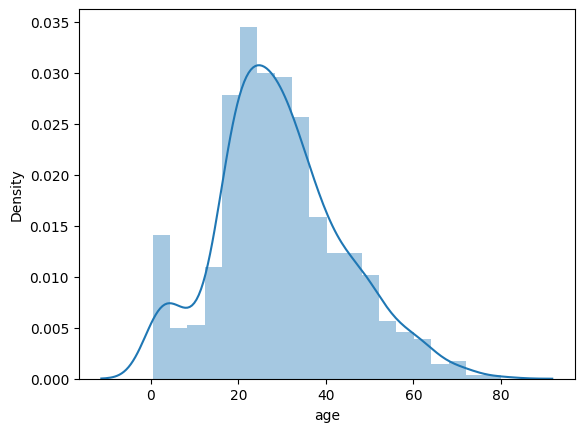

In [16]:
# 1. mean value imputation: this imputation is best if our column is normally distributed
sns.distplot(df['age'])
# observation:
# df['age'] -> almost normal distribution

In [17]:
avg = df['age'].mean()
df['age'].isna().sum()

np.int64(177)

In [18]:
df['Age_mean'] = df['age'].fillna(avg) # this imputation is best if our column is normally distributed

In [19]:
df

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone   Age_mean  
0      man        True  NaN  Southampton    no  False  22.000000  
1    woman       False    C    Cherbourg   yes  False  38.000000  
2    woman       False  NaN  Southampton   yes   True  26.000000  
3    woman       False    C  Southampton   yes  False  35.000000  
4      man        True  NaN  Southampton    no   True  35.000000  
..     ...         ...  ...          ...   ...    ...        ...  
886    man        True  NaN  Southampton    no   True  27.000000  
887  woman       False    B  Southampton   yes   True  19.000000  
888  woman       False  NaN  Southampton    no  False  29.699118  
889    man        True    C    Cherbourg   yes   True  26.000000  
890    man        True  NaN   Queenstown    no   True  32.000000  

[891 rows x 16 columns]

In [21]:
# 2. Median Inputation: if we have outliers in our dataset then we should this techniques
median = df['age'].median()
df['age_median'] = df['age'].fillna(median)
df

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone   Age_mean  age_median  
0      man        True  NaN  Southampton    no  False  22.000000        22.0  
1    woman       False    C    Cherbourg   yes  False  38.000000        38.0  
2    woman       False  NaN  Southampton   yes   True  26.000000        26.0  
3    woman       False    C  Southampton   yes  False  35.000000        35.0  
4      man        True  NaN  Southampton    no   True  35.000000        35.0  
..     ...         ...  ...          ...   ...    ...        ...         ...  
886    man        True  NaN  Southampton    no   True  27.000000        27.0  
887  woman       False    B  Southampton   yes   True  19.000000        19.0  
888  woman       False  NaN  Southampton    no  False  29.699118        28.0  
889    man        True    C    Cherbourg   yes   True  26.000000        26.0  
890    man        True  NaN   Queenstown    no   True  32.000000        32.0  

[891 rows x 17 columns]

In [23]:
# 3. Mode Imputation: best for categorical features
df['embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: object

In [24]:
import pandas as pd

In [25]:
# using categorical method for finding the unique values
pd.Categorical(df['embarked'])

['S', 'C', 'S', 'S', 'S', ..., 'S', 'S', 'S', 'C', 'Q']
Length: 891
Categories (3, object): ['C', 'Q', 'S']

In [26]:
# using values count for finding the unique
df['embarked'].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [29]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [28]:
df['embarked'].isna().sum()

np.int64(2)

In [34]:
df['age'].notna()

0       True
1       True
2       True
3       True
4       True
       ...  
886     True
887     True
888    False
889     True
890     True
Name: age, Length: 891, dtype: bool

In [38]:
df[df['age'].notna()]['embarked'].mode()[0]

'S'

In [39]:
mode = df[df['age'].notna()]['embarked'].mode()[0]

In [40]:
df['embarked_mode'] = df['embarked'].fillna(mode)

In [41]:
df

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone   Age_mean  age_median  \
0      man        True  NaN  Southampton    no  False  22.000000        22.0   
1    woman       False    C    Cherbourg   yes  False  38.000000        38.0   
2    woman       False  NaN  Southampton   yes   True  26.000000        26.0   
3    woman       False    C  Southampton   yes  False  35.000000        35.0   
4      man        True  NaN  Southampton    no   True  35.000000        35.0   
..     ...         ...  ...          ...   ...    ...        ...         ...   
886    man        True  NaN  Southampton    no   True  27.000000        27.0   
887  woman       False    B  Southampton   yes   True  19.000000        19.0   
888  woman       False  NaN  Southampton    no  False  29.699118        28.0   
889    man        True    C    Cherbourg   yes   True  26.000000        26.0   
890    man        True  NaN   Queenstown    no   True  32.000000        32.0   

    embarked_mode  
0               S  
1               C  
2               S  
3               S  
4               S  
..            ...  
886             S  
887             S  
888             S  
889             C  
890             Q  

[891 rows x 18 columns]

In [42]:
# 4. Random value imputation
df

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone   Age_mean  age_median  \
0      man        True  NaN  Southampton    no  False  22.000000        22.0   
1    woman       False    C    Cherbourg   yes  False  38.000000        38.0   
2    woman       False  NaN  Southampton   yes   True  26.000000        26.0   
3    woman       False    C  Southampton   yes  False  35.000000        35.0   
4      man        True  NaN  Southampton    no   True  35.000000        35.0   
..     ...         ...  ...          ...   ...    ...        ...         ...   
886    man        True  NaN  Southampton    no   True  27.000000        27.0   
887  woman       False    B  Southampton   yes   True  19.000000        19.0   
888  woman       False  NaN  Southampton    no  False  29.699118        28.0   
889    man        True    C    Cherbourg   yes   True  26.000000        26.0   
890    man        True  NaN   Queenstown    no   True  32.000000        32.0   

    embarked_mode  
0               S  
1               C  
2               S  
3               S  
4               S  
..            ...  
886             S  
887             S  
888             S  
889             C  
890             Q  

[891 rows x 18 columns]

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   survived       891 non-null    int64   
 1   pclass         891 non-null    int64   
 2   sex            891 non-null    object  
 3   age            714 non-null    float64 
 4   sibsp          891 non-null    int64   
 5   parch          891 non-null    int64   
 6   fare           891 non-null    float64 
 7   embarked       889 non-null    object  
 8   class          891 non-null    category
 9   who            891 non-null    object  
 10  adult_male     891 non-null    bool    
 11  deck           203 non-null    category
 12  embark_town    889 non-null    object  
 13  alive          891 non-null    object  
 14  alone          891 non-null    bool    
 15  Age_mean       891 non-null    float64 
 16  age_median     891 non-null    float64 
 17  embarked_mode  891 non-null    obje

In [48]:
float64_df = df[df.dtypes[df.dtypes=='float64'].index]
float64_df

age     fare   Age_mean  age_median
0    22.0   7.2500  22.000000        22.0
1    38.0  71.2833  38.000000        38.0
2    26.0   7.9250  26.000000        26.0
3    35.0  53.1000  35.000000        35.0
4    35.0   8.0500  35.000000        35.0
..    ...      ...        ...         ...
886  27.0  13.0000  27.000000        27.0
887  19.0  30.0000  19.000000        19.0
888   NaN  23.4500  29.699118        28.0
889  26.0  30.0000  26.000000        26.0
890  32.0   7.7500  32.000000        32.0

[891 rows x 4 columns]